In [84]:
import pandas as pd

In [85]:
df = pd.read_csv("customer_churn_data.csv")
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [87]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [88]:
df['InternetService']= df['InternetService'].fillna('')


In [89]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [90]:
df.duplicated().sum()

np.int64(0)

In [91]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [92]:
numeric_col_data = df.select_dtypes(include=['number'])

In [93]:
numeric_col_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [94]:
import matplotlib.pyplot as plt

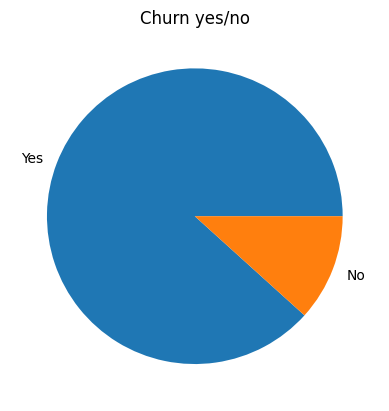

In [95]:
df['Churn'].value_counts().plot(kind="pie")
plt.title('Churn yes/no')
plt.ylabel("")
plt.show()

In [96]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [97]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [98]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [99]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

At lower terms we can find that monthy charge average decreases

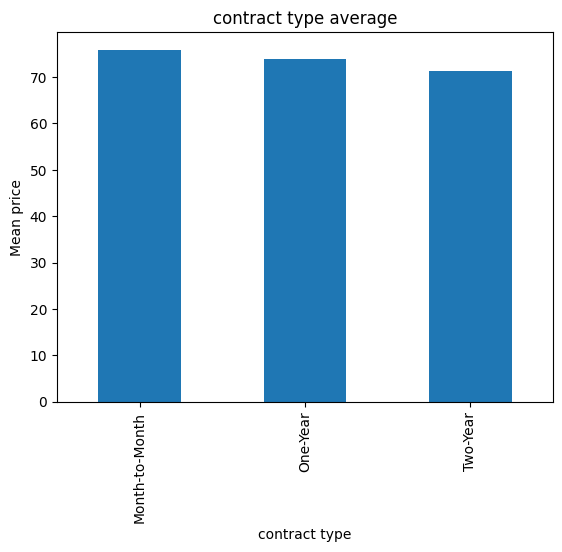

In [100]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('contract type average')
plt.ylabel('Mean price')
plt.xlabel('contract type')
plt.show()

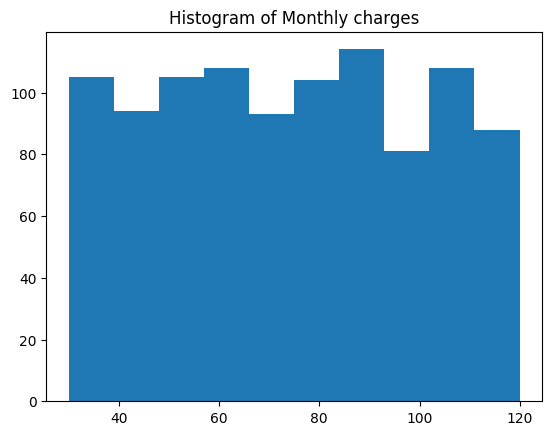

In [101]:
plt.hist(df['MonthlyCharges'])
plt.title('Histogram of Monthly charges')
plt.show()

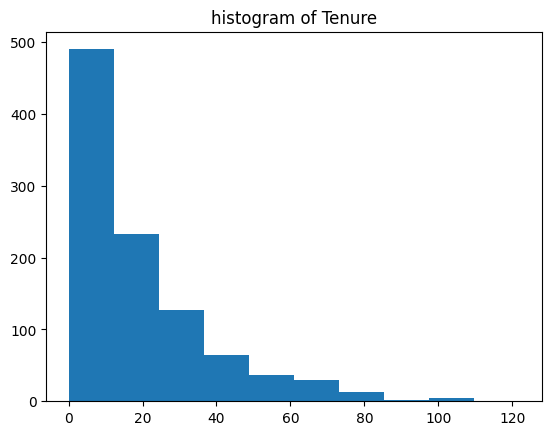

In [102]:
plt.hist(df['Tenure'])
plt.title("histogram of Tenure")
plt.show()

FEATURE ENGINEERING

In [103]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [104]:
y = df[['Churn']]
X= df[['Age','Gender','MonthlyCharges','Tenure']]

In [105]:
X

,Age,Gender,MonthlyCharges,Tenure
0,49,Male,88.35,4
1,43,Male,36.67,0
2,51,Female,63.79,2
3,60,Female,102.34,8
4,42,Male,69.01,32
...,...,...,...,...
995,42,Male,37.14,41
996,62,Male,80.93,9
997,51,Female,111.72,15
998,39,Male,65.67,68


In [106]:
X['Gender'] = X['Gender'].apply(lambda x:1 if x == 'Female' else 0)

C:\Users\PC\AppData\Local\Temp\ipykernel_12016\1822032154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].apply(lambda x:1 if x == 'Female' else 0)


In [107]:
X.head()

,Age,Gender,MonthlyCharges,Tenure
0,49,0,88.35,4
1,43,0,36.67,0
2,51,1,63.79,2
3,60,1,102.34,8
4,42,0,69.01,32


In [108]:
y['Churn'] = y['Churn'].apply(lambda x:1 if x == 'Yes' else 0)

C:\Users\PC\AppData\Local\Temp\ipykernel_12016\2674005281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].apply(lambda x:1 if x == 'Yes' else 0)


In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [111]:
X_train = scaler.fit_transform(X_train)

In [112]:
import joblib
joblib.dump(scaler,'scaleer.pkl')

['scaleer.pkl']

In [113]:
X_test = scaler.fit_transform(X_test)

In [114]:
from sklearn.metrics import accuracy_score
def model_performance(predictions):
    print('Accuracy score on model {}'.format(accuracy_score(y_test,predictions)))

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [116]:
log_model = LogisticRegression()

In [117]:
log_model.fit(X_train,y_train)

c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [118]:
y_pred = log_model.predict(X_test)

In [119]:
model_performance(y_pred)

Accuracy score on model 0.915


In [120]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance']
}

gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [121]:
gridkn.fit(X_train,y_train)

c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [122]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [123]:
y_pred = gridkn.predict(X_test)

In [124]:
model_performance(y_pred)

Accuracy score on model 0.91


In [125]:
from sklearn.svm import SVC
svm = SVC()

In [126]:
param_grid={
    'C': [0.01,0.1,0.5,1],
    'kernel': ['linear','rbf','poly']
}

In [127]:
gridsvc = GridSearchCV(svm,param_grid,cv=5)

In [128]:
gridsvc.fit(X_train,y_train)

c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConve

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [129]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [130]:
y_pred = gridsvc.predict(X_test)

In [131]:
model_performance(y_pred)

Accuracy score on model 0.915


In [132]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [133]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [134]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [135]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [136]:
y_pred = grid_tree.predict(X_test)

In [137]:
model_performance(y_pred)

Accuracy score on model 0.865


In [138]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [139]:
param_grid ={
    'n_estimators': [32,64,128,256],
    'max_features':[2,3,4],
    'bootstrap': [True,False]
}

In [140]:
grid_rfc = GridSearchCV(rfc,param_grid,cv=5)

In [141]:
grid_rfc.fit(X_train,y_train)

c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PC\OneDrive\Documents\churn_prediction\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionW

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [142]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [143]:
y_pred = grid_rfc.predict(X_test)

In [144]:
model_performance(y_pred)

Accuracy score on model 0.895


In [145]:
best_model = gridsvc.best_estimator_

In [146]:
joblib.dump(best_model,'model.pkl')

['model.pkl']